### Guessing the steering angle

In the previous notebook you simulated the Dubins Car model by choosing random steering angles. In this case, you'll consider the case where you have a destination `x2` in mind, and you guess controls that move you toward your destination, maybe ;). 


In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = 12, 12

Implement a function called `steer()`, which takes as inputs two **states** `x1` and `x2` and returns a control input (steering angle) that "tries" to make progress from `x1` to `x2`. This method should consist roughly of the following:

1. Get a sense of where `x2` is relative to the state of `x1` by calculating the orientation difference between the current orientation, $\theta$, and the direction toward `x2`.
2. Generate a random steering angle by sampling from a gaussian that is centered roughly on some direction that will move you from `x1` to `x2`.
3. Clip the angle if it is outside the range allowed by `MAX_STEERING_ANGLE`.

This might all sound a little fuzzy, but that's the idea here! We're just going to try some guessing and see if we can find a simple method for making progress from `x1` to `x2`.  

**Inconsistency note:** Point 1 of the guidance above suggests a _dynamic_ solution. That is, as the car moves away from `x1`, the direction to `x2` should be calculated from the _current position_, not `x1`. In this sense, `x1` is the start state and is only "current" in the very first moment. However, the usage of `steer` in the following code does not predicate this dynamic solution. Instead, the angles for each step are precomputed with `x1` and `x2` fixed. The variation is only going to be due to the Gaussian.

**Resolution note:** The visualization in the solution is only showing the first T steps for the trajectory maintaining one of the precomputed randomized steering angles. The point is to show the variation of the local trajectories at the current position, but it is only being visualized for the start state. So, `steer` should definitely use the current state to calculate the next steering angle and be called before `simulate`. This visualization of the full trajectory from `x1` to `x2` should be done separately.

In [6]:
np.clip(3.15, -3, 3)

3.0

In [7]:
np.random.randn()

0.7927389308455521

In [8]:
# limit the steering angle range
MAX_STEERING_ANGLE = np.deg2rad(30)

def steer(s1, s2):
    x1, y1, theta1 = s1
    x2, y2, theta2 = s2

    # 1. Current theta
    theta_curr = theta1

    # 2. Theta to goal
    theta_goal = np.arctan2(y2-y1, x2-x1)
    
    # 3. Steering angle mean
    u_mean = theta_goal - theta_curr
    
    # 4. Randomize (Gaussian)
    sigma_squared = 1
    u_mean = np.sqrt(sigma_squared) * np.random.randn() + u_mean
    
    return np.clip(u_mean, -MAX_STEERING_ANGLE, MAX_STEERING_ANGLE)

Modification of the Dubin's car simulation from the previous notebook.

In [9]:
def simulate(state, angle, v, dt):
    x = state[0]
    y = state[1]
    theta = state[2]    
    
    nx = x + v*np.cos(theta)*dt
    ny = y + v*np.sin(theta)*dt
    ntheta = theta + v*np.tan(angle)*dt
    
    return [nx, ny, ntheta]

### Visualizing initial trajectory with randomized steering angle

Initially, we place the car at the center of the coordinate system (0, 0) and give heading of $0$ which is facing in the positive direction along the $x$ axis.

In [10]:
# travel in time increments of `dt` up until `T`.
dt = 0.2
T = 10

start = [0, 0, 0]
goal = [10, 0, 0]

# Run the simulation 100 times to get a feel for the output
angles = [steer(start, goal) for _ in range(100)]
lines = []

# Note: 
for angle in angles:
    line = [start]
    state = np.copy(start)
    v = np.random.uniform(0, 1)
    for _ in np.arange(0, T, dt):
        state = simulate(state, angle, v, dt)
        line.append(state)
    lines.append(line)
    
lines = np.array(lines)
print(lines.shape)

(100, 51, 3)


Now let's visualize the path! It should be a smooth path from the start location to the goal location.

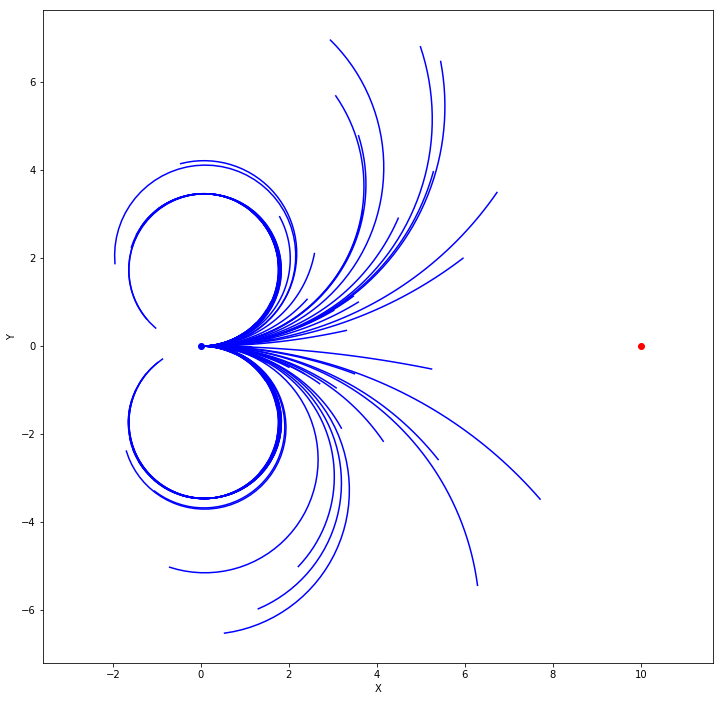

In [11]:
for i in range(lines.shape[0]):
    plt.plot(lines[i, :, 0], lines[i, :, 1], 'b-')
plt.plot(start[0], start[1], 'bo')
plt.plot(goal[0], goal[1], 'ro')
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

[solution](/notebooks/Steering-Solution.ipynb)

### Visualizing start-goal trajectories with dynamic steering angle

In [26]:
# travel in time increments of `dt` up until `T`.
dt = 0.1
T = 12

start = [0, 0, 0]
goal = [10, 5, 0]

lines = []

# Note: 
NUM_TRAJECTORIES = 100
for _ in range(NUM_TRAJECTORIES):
    line = [start]
    state = np.copy(start)
    v = np.random.uniform(0, 1)
    for _ in np.arange(0, T, dt):
        state = simulate(state, steer(state, goal), v, dt)
        line.append(state)
    lines.append(line)
    
lines = np.array(lines)
print(lines.shape)

(100, 121, 3)


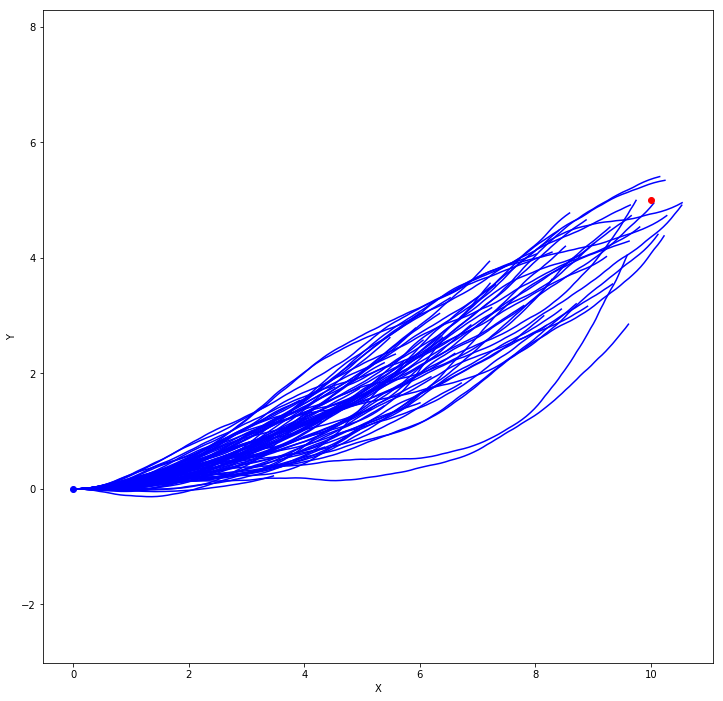

In [27]:
for i in range(lines.shape[0]):
    plt.plot(lines[i, :, 0], lines[i, :, 1], 'b-')
plt.plot(start[0], start[1], 'bo')
plt.plot(goal[0], goal[1], 'ro')
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()